- Import example data (or make it up using code developed by you or AI, just explain it) 
    - examples
        - Binomial
        - Poisson
        - Negative binomial
        - Normal
        - Log-normal 

plot the data showing the frequency of your data with the probability density on the y axis 
    

In [9]:
import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)

# Parameters
n_sites = 30
habitats = ["forest", "grassland", "wetland"]

# Generate dataset
data = []
for i in range(n_sites):
    site = f"S{i+1:02d}"
    habitat = np.random.choice(habitats)
    days = np.random.randint(5, 15)
    
    # Expected rate of bird sightings depends on habitat
    if habitat == "forest":
        lam = np.random.uniform(3, 6)
    elif habitat == "grassland":
        lam = np.random.uniform(1, 3)
    else:  # wetland
        lam = np.random.uniform(4, 8)
        
    # Generate Poisson-distributed sightings
    sightings = np.random.poisson(lam, size=days)
    
    for day, count in enumerate(sightings, start=1):
        data.append([site, habitat, day, lam, count])

df = pd.DataFrame(data, columns=["site_id", "habitat_type", "day", "mean_sightings", "bird_sightings"])

# Save
df.to_csv("poisson_conservation_dataset.csv", index=False)
df.head()


,site_id,habitat_type,day,mean_sightings,bird_sightings
0,S01,wetland,1,7.802857,6
1,S01,wetland,2,7.802857,6
2,S01,wetland,3,7.802857,7
3,S01,wetland,4,7.802857,7
4,S01,wetland,5,7.802857,8


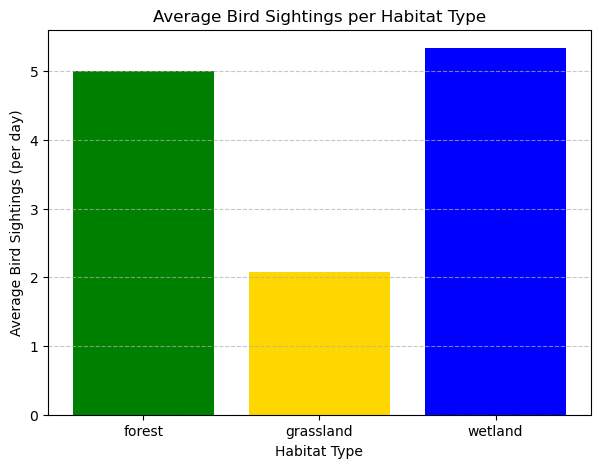

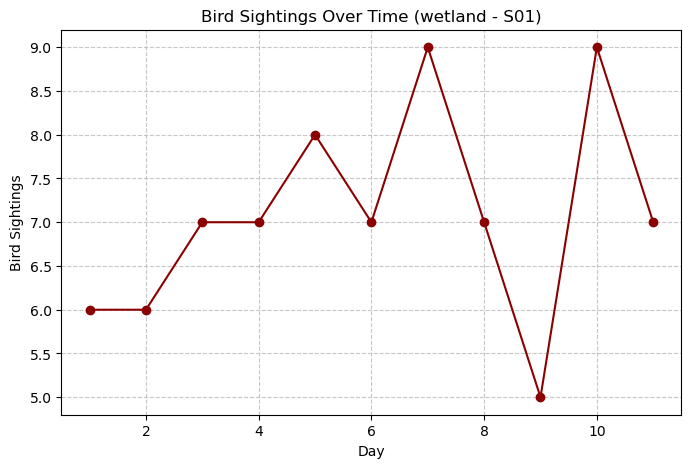

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Generate Poisson dataset
# -----------------------------
np.random.seed(42)

n_sites = 30
habitats = ["forest", "grassland", "wetland"]
data = []

for i in range(n_sites):
    site = f"S{i+1:02d}"
    habitat = np.random.choice(habitats)
    days = np.random.randint(8, 20)
    
    # Expected rate (lambda)
    if habitat == "forest":
        lam = np.random.uniform(3, 6)
    elif habitat == "grassland":
        lam = np.random.uniform(1, 3)
    else:  # wetland
        lam = np.random.uniform(4, 8)
        
    sightings = np.random.poisson(lam, size=days)
    
    for day, count in enumerate(sightings, start=1):
        data.append([site, habitat, day, lam, count])

df = pd.DataFrame(data, columns=["site_id", "habitat_type", "day", "mean_sightings", "bird_sightings"])

# -----------------------------
# Compute average counts
# -----------------------------
mean_counts = df.groupby("habitat_type")["bird_sightings"].mean()

# -----------------------------
# Plot 1: Bar chart of mean sightings per habitat
# -----------------------------
plt.figure(figsize=(7, 5))
plt.bar(mean_counts.index, mean_counts.values, color=['green', 'gold', 'blue'])
plt.title("Average Bird Sightings per Habitat Type")
plt.xlabel("Habitat Type")
plt.ylabel("Average Bird Sightings (per day)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# -----------------------------
# Plot 2: Line plot for one example site
# -----------------------------
site_example = df[df["site_id"] == "S01"]

plt.figure(figsize=(8, 5))
plt.plot(site_example["day"], site_example["bird_sightings"],
         marker='o', linestyle='-', color='darkred')
plt.title(f"Bird Sightings Over Time ({site_example.iloc[0]['habitat_type']} - {site_example.iloc[0]['site_id']})")
plt.xlabel("Day")
plt.ylabel("Bird Sightings")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()